In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Start with original case study dataset with 2015 HIV incidence rate data

In [3]:
df = pd.read_csv('merged_data.csv')
df = df.drop('Unnamed: 0', axis=1)

In [4]:
# Setting bad datapoint (HIV incidence = 771.4) to 0
df.loc[df['HIVincidence']>700] = 0

In [5]:
df['HIVincidence'].max()

118.9

In [6]:
df.columns = ['ST' if x=='STATEABBREVIATION' else x for x in df.columns]

In [7]:
df.head(2)

,county_code,COUNTY,ST,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058


## Add new features and 2017 and 2018 incidence rates

In [10]:
hiv_new = pd.read_csv('hiv_incidence_2017_2018.csv')
hiv_new.head(2)
hiv_new['Rate per 100000 / 2018'].describe()

count                3224
unique                301
top       Data suppressed
freq                 1241
Name: Rate per 100000 / 2018, dtype: object

In [161]:
urbanization = pd.read_csv('urbanization_level_2013.csv')

In [162]:
hiv_new= hiv_new.merge(urbanization, how='inner', on=['Geography'])
hiv_new

,Geography,Rate per 100000 / 2018,Rate per 100000 / 2017,FIPS,Urbanization Level
0,"Abbeville County, SC",Data suppressed,0,45001,Suburban
1,"Acadia Parish, LA",19.8,11.8,22001,Urban
2,"Accomack County, VA",Data suppressed,Data suppressed,51001,Rural
3,"Ada County, ID",3.3,4.5,16001,Urban
4,"Adair County, IA",0,0,19001,Rural
...,...,...,...,...,...
3219,"Yuma County, AZ",8.1,8.8,4027,Urban
3220,"Yuma County, CO",Data suppressed,0,8125,Rural
3221,"Zapata County, TX",0,Data suppressed,48505,Suburban
3222,"Zavala County, TX",0,0,48507,Rural


In [163]:
hiv_new['Geography'] = hiv_new['Geography'].astype(str).str
hiv_new['ST'] = hiv_new['Geography'][0][-2:]
hiv_new['COUNTY'] = hiv_new['Geography'][0][:-4]
hiv_new.columns = ['HIV_Incidence_2017' if x=='Rate per 100000 / 2017' else x for x in hiv_new.columns]
hiv_new.columns = ['HIV_Incidence_2018' if x=='Rate per 100000 / 2018' else x for x in hiv_new.columns]
hiv_new = hiv_new.drop('Geography', axis=1)

In [164]:
hiv_new['HIV_Incidence_2017'].replace(to_replace=['Data suppressed'], value = 0, inplace =True) 
hiv_new['HIV_Incidence_2018'].replace(to_replace=['Data suppressed'], value = 0, inplace =True) 
hiv_new['HIV_Incidence_2017'].replace(to_replace=['Data not available'], value = 0, inplace =True) 
hiv_new['HIV_Incidence_2018'].replace(to_replace=['Data not available'], value = 0, inplace =True) 

hiv_new['HIV_Incidence_2017'] = hiv_new['HIV_Incidence_2017'].astype(float)
hiv_new['HIV_Incidence_2018'] = hiv_new['HIV_Incidence_2018'].astype(float)

In [165]:
df = df.merge(hiv_new, how='left', left_on=['county_code', 'ST', 'COUNTY'], right_on=['FIPS', 'ST', 'COUNTY'])
df

,county_code,COUNTY,ST,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income,HIV_Incidence_2018,HIV_Incidence_2017,FIPS,Urbanization Level
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,514,1.715611,2.648120,8.5,12.8,20304,0.0,21.6,1001.0,Urban
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,1429,1.326659,2.049509,8.6,13.8,73058,7.6,6.1,1003.0,Urban
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,127,0.708913,1.097951,14.2,24.1,9145,28.3,0.0,1005.0,Suburban
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,184,1.251578,1.935212,10.9,17.0,7078,0.0,25.9,1007.0,Urban
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,928,2.812617,4.342943,9.3,17.3,20934,10.3,0.0,1009.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,Sweetwater County,WY,2015,0.0,0.0,0.0,86.5,3.0,0.0,...,274,1.044803,1.617378,5.6,12.2,16687,0.0,0.0,56037.0,Suburban
3136,56039,Teton County,WY,2015,0.0,0.0,0.0,50.5,2.0,0.0,...,78,0.545137,0.850414,3.6,8.5,7873,0.0,0.0,56039.0,Rural
3137,56041,Uinta County,WY,2015,0.0,0.0,0.0,0.0,4.0,0.0,...,116,1.013377,1.567356,5.8,14.2,7557,0.0,0.0,56041.0,Rural
3138,56043,Washakie County,WY,2015,0.0,0.0,0.0,0.0,1.0,0.0,...,27,0.541229,0.859599,7.9,14.2,3461,0.0,0.0,56043.0,Rural


## Add COVID

In [166]:
covid = pd.read_csv("https://raw.githubusercontent.com/salvir1/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-31-2020.csv")

In [167]:
covid = covid[covid['Country_Region'] == 'US']
covid.columns = ['ST_COV' if x=='Province_State' else x for x in covid.columns]
covid.columns = ['COUNTY_COV' if x=='Admin2' else x for x in covid.columns]
covid.columns = ['COVID_Incidence' if x=='Incidence_Rate' else x for x in covid.columns]

In [168]:
covid = covid[['FIPS','COUNTY_COV', 'ST_COV', 'COVID_Incidence']]

In [169]:
df = df.merge(covid, how='left', left_on=['county_code'], right_on=['FIPS'])

In [170]:
df

,county_code,COUNTY,ST,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,poverty_rate,household_income,HIV_Incidence_2018,HIV_Incidence_2017,FIPS_x,Urbanization Level,FIPS_y,COUNTY_COV,ST_COV,COVID_Incidence
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,12.8,20304,0.0,21.6,1001.0,Urban,1001.0,Autauga,Alabama,1739.784138
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,13.8,73058,7.6,6.1,1003.0,Urban,1003.0,Baldwin,Alabama,1368.967093
2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,0.0,...,24.1,9145,28.3,0.0,1005.0,Suburban,1005.0,Barbour,Alabama,2227.983472
3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,0.0,...,17.0,7078,0.0,25.9,1007.0,Urban,1007.0,Bibb,Alabama,1585.246048
4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,0.0,...,17.3,20934,10.3,0.0,1009.0,Urban,1009.0,Blount,Alabama,1184.588248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,Sweetwater County,WY,2015,0.0,0.0,0.0,86.5,3.0,0.0,...,12.2,16687,0.0,0.0,56037.0,Suburban,56037.0,Sweetwater,Wyoming,566.799707
3136,56039,Teton County,WY,2015,0.0,0.0,0.0,50.5,2.0,0.0,...,8.5,7873,0.0,0.0,56039.0,Rural,56039.0,Teton,Wyoming,1427.719059
3137,56041,Uinta County,WY,2015,0.0,0.0,0.0,0.0,4.0,0.0,...,14.2,7557,0.0,0.0,56041.0,Rural,56041.0,Uinta,Wyoming,1255.809354
3138,56043,Washakie County,WY,2015,0.0,0.0,0.0,0.0,1.0,0.0,...,14.2,3461,0.0,0.0,56043.0,Rural,56043.0,Washakie,Wyoming,614.990391


## Add state level HIV response and public health \\$ data

In [171]:
public_health_expenditure = pd.read_csv("public_health_response_data.csv")

In [172]:
public_health_expenditure.head(2)

,Location,per_cap_phe_2018,SSP_ban
0,AL,57.23,1
1,AK,96.52,1


In [173]:
df = df.merge(public_health_expenditure, how='left', left_on='ST', right_on="Location")

In [174]:
df.head(2)


,county_code,COUNTY,ST,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,HIV_Incidence_2017,FIPS_x,Urbanization Level,FIPS_y,COUNTY_COV,ST_COV,COVID_Incidence,Location,per_cap_phe_2018,SSP_ban
0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,0.0,...,21.6,1001.0,Urban,1001.0,Autauga,Alabama,1739.784138,AL,57.23,1.0
1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,0.0,...,6.1,1003.0,Urban,1003.0,Baldwin,Alabama,1368.967093,AL,57.23,1.0


In [175]:
NY = df[df['ST'] == 'NY']
NY

,county_code,COUNTY,ST,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,HIV_Incidence_2017,FIPS_x,Urbanization Level,FIPS_y,COUNTY_COV,ST_COV,COVID_Incidence,Location,per_cap_phe_2018,SSP_ban
1827,36001,Albany County,NY,2015,0.0,25.0,9.3,375.1,14.0,0.0,...,13.1,36001.0,Urban,36001.0,Albany,New York,819.296511,NY,83.99,0.0
1828,36003,Allegany County,NY,2015,0.0,0.0,0.0,91.0,4.0,0.0,...,0.0,36003.0,Rural,36003.0,Allegany,New York,160.551952,NY,83.99,0.0
1829,36005,Bronx County,NY,2015,1.0,540.0,45.7,2258.2,55.0,1.0,...,43.0,36005.0,Urban,NaN,NaN,NaN,NaN,NY,83.99,0.0
1830,36007,Broome County,NY,2015,0.0,18.0,10.6,236.0,11.0,0.0,...,7.2,36007.0,Urban,36007.0,Broome,New York,544.391248,NY,83.99,0.0
1831,36009,Cattaraugus County,NY,2015,0.0,0.0,0.0,123.6,10.0,0.0,...,0.0,36009.0,Suburban,36009.0,Cattaraugus,New York,207.575180,NY,83.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,36115,Washington County,NY,2015,0.0,0.0,0.0,361.2,1.0,0.0,...,0.0,36115.0,Urban,36115.0,Washington,New York,415.005555,NY,83.99,0.0
1885,36117,Wayne County,NY,2015,0.0,5.0,6.5,153.8,3.0,0.0,...,6.5,36117.0,Urban,36117.0,Wayne,New York,272.470473,NY,83.99,0.0
1886,36119,Westchester County,NY,2015,0.0,93.0,11.4,402.8,50.0,0.0,...,14.3,36119.0,Urban,36119.0,Westchester,New York,3713.982136,NY,83.99,0.0
1887,36121,Wyoming County,NY,2015,0.0,0.0,0.0,452.7,2.0,0.0,...,0.0,36121.0,Suburban,36121.0,Wyoming,New York,280.990491,NY,83.99,0.0


In [176]:
df['COVID_Incidence'].fillna(0, inplace = True)

In [177]:
df[df['COVID_Incidence'].isna() == True]

,county_code,COUNTY,ST,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,HIV_Incidence_2017,FIPS_x,Urbanization Level,FIPS_y,COUNTY_COV,ST_COV,COVID_Incidence,Location,per_cap_phe_2018,SSP_ban


## End of adding new features

## HIV and COVID correlation

In [206]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sms

In [207]:
df['Urbanization Level'].values

array(['Urban', 'Urban', 'Suburban', ..., 'Rural', 'Rural', 'Rural'],
      dtype=object)

In [208]:
urban    = df[df['Urbanization Level'] == 'Urban']
suburban = df[df['Urbanization Level'] == 'Suburban']
rural    = df[df['Urbanization Level'] == 'Rural']


In [209]:
correlations = suburban[['HIVincidence','HIV_Incidence_2018', 'HIVprevalence', 'SA_fac', 'unemployment_rate','poverty_rate', 'household_income',
       'COVID_Incidence','per_cap_phe_2018', 'SSP_ban']]

In [210]:
correlations.corr()

,HIVincidence,HIV_Incidence_2018,HIVprevalence,SA_fac,unemployment_rate,poverty_rate,household_income,COVID_Incidence,per_cap_phe_2018,SSP_ban
HIVincidence,1.000000,0.470260,0.522451,0.020777,0.239136,0.281749,0.059507,0.304726,-0.050326,0.152770
HIV_Incidence_2018,0.470260,1.000000,0.485722,0.005299,0.227261,0.253945,0.067488,0.301809,-0.097503,0.200587
HIVprevalence,0.522451,0.485722,1.000000,-0.053204,0.383345,0.416930,-0.032681,0.451154,-0.090522,0.236659
SA_fac,0.020777,0.005299,-0.053204,1.000000,0.005564,-0.072306,0.567999,-0.136127,0.155228,-0.143926
unemployment_rate,0.239136,0.227261,0.383345,0.005564,1.000000,0.640637,0.066235,0.292281,-0.050527,-0.037376
poverty_rate,0.281749,0.253945,0.416930,-0.072306,0.640637,1.000000,-0.101207,0.436402,-0.082837,0.240370
household_income,0.059507,0.067488,-0.032681,0.567999,0.066235,-0.101207,1.000000,-0.131652,0.034254,-0.262618
COVID_Incidence,0.304726,0.301809,0.451154,-0.136127,0.292281,0.436402,-0.131652,1.000000,-0.128048,0.345537
per_cap_phe_2018,-0.050326,-0.097503,-0.090522,0.155228,-0.050527,-0.082837,0.034254,-0.128048,1.000000,-0.245385
SSP_ban,0.152770,0.200587,0.236659,-0.143926,-0.037376,0.240370,-0.262618,0.345537,-0.245385,1.000000


/home/salvir1/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Incidence Rates By County Per 100,000 People')

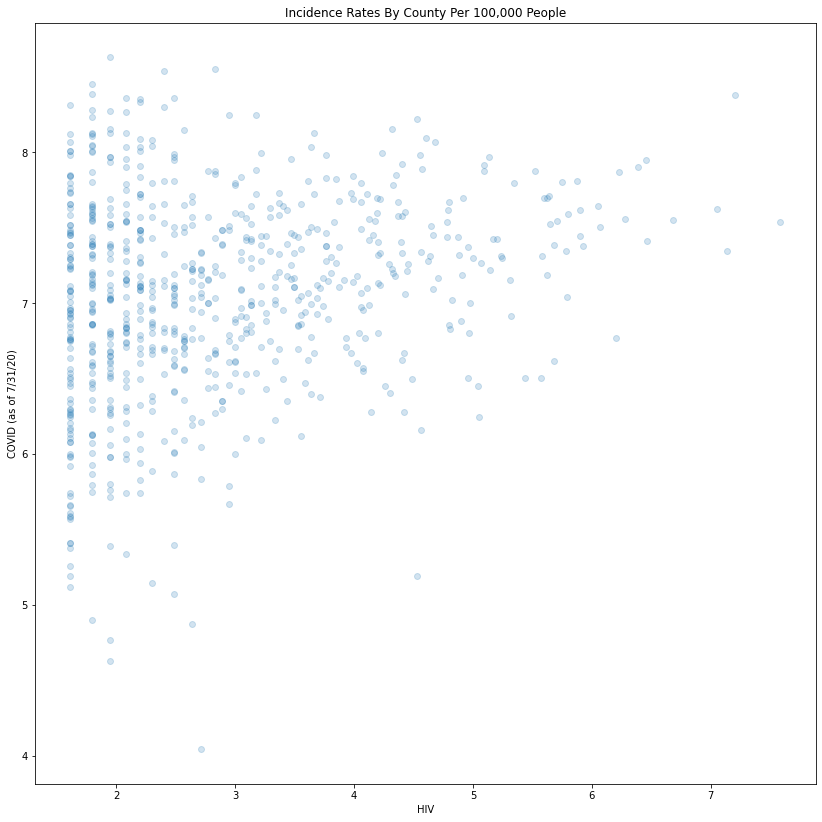

In [211]:
fig, ax = plt.subplots(figsize = (14,14))

ax.scatter(np.log(df['HIVdiagnoses']), np.log(df['COVID_Incidence']), alpha = 0.2)
ax.set_xlabel('HIV')
ax.set_ylabel('COVID (as of 7/31/20)')
ax.set_title('Incidence Rates By County Per 100,000 People')

Text(0.5, 1.0, 'Incidence Rates By County Per 100,000 People--Urban Counties')

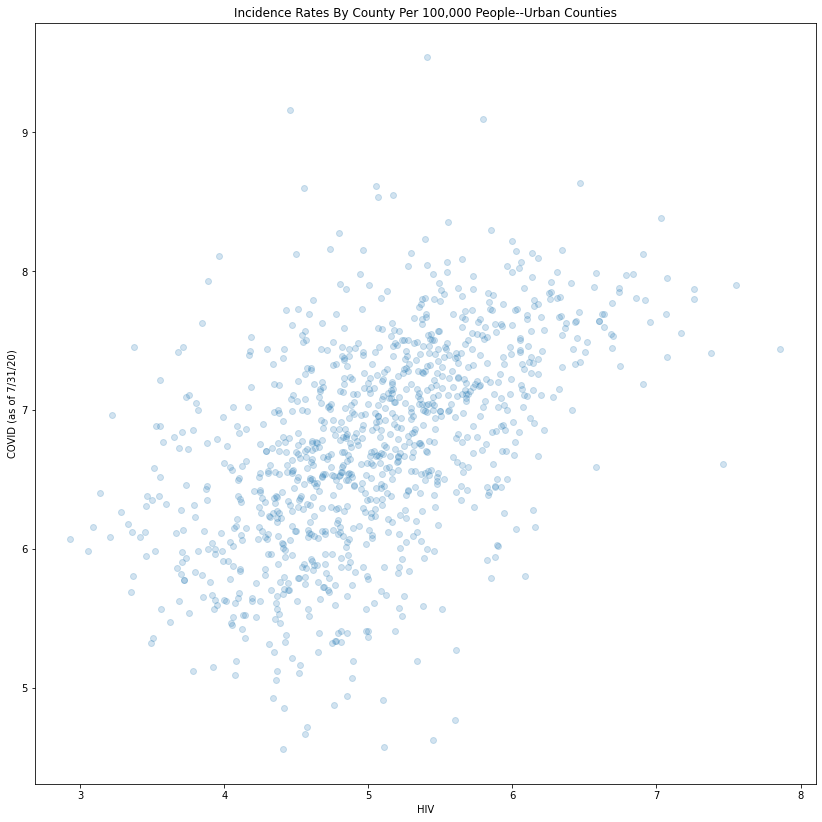

In [212]:
fig, ax = plt.subplots(figsize = (14,14))

ax.scatter(np.log(urban['HIVprevalence']), np.log(urban['COVID_Incidence']), alpha = 0.2)
ax.set_xlabel('HIV')
ax.set_ylabel('COVID (as of 7/31/20)')
ax.set_title('Incidence Rates By County Per 100,000 People--Urban Counties')

Text(0.5, 1.0, 'Incidence Rates By County Per 100,000 People--Rural Counties')

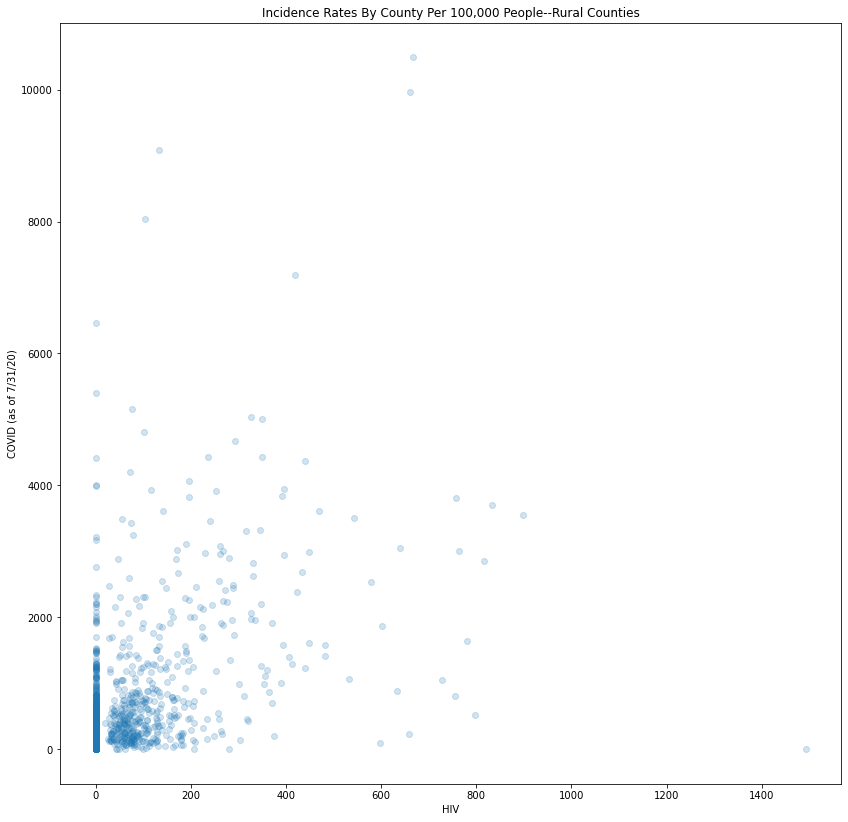

In [213]:
fig, axs = plt.subplots(figsize = (14,14))

axs.scatter(rural['HIVprevalence'], rural['COVID_Incidence'], alpha = 0.2)
axs.set_xlabel('HIV')
axs.set_ylabel('COVID (as of 7/31/20)')
axs.set_title('Incidence Rates By County Per 100,000 People--Rural Counties')

Text(0.5, 1.0, 'Incidence Rates By County Per 100,000 People--Suburban Counties')

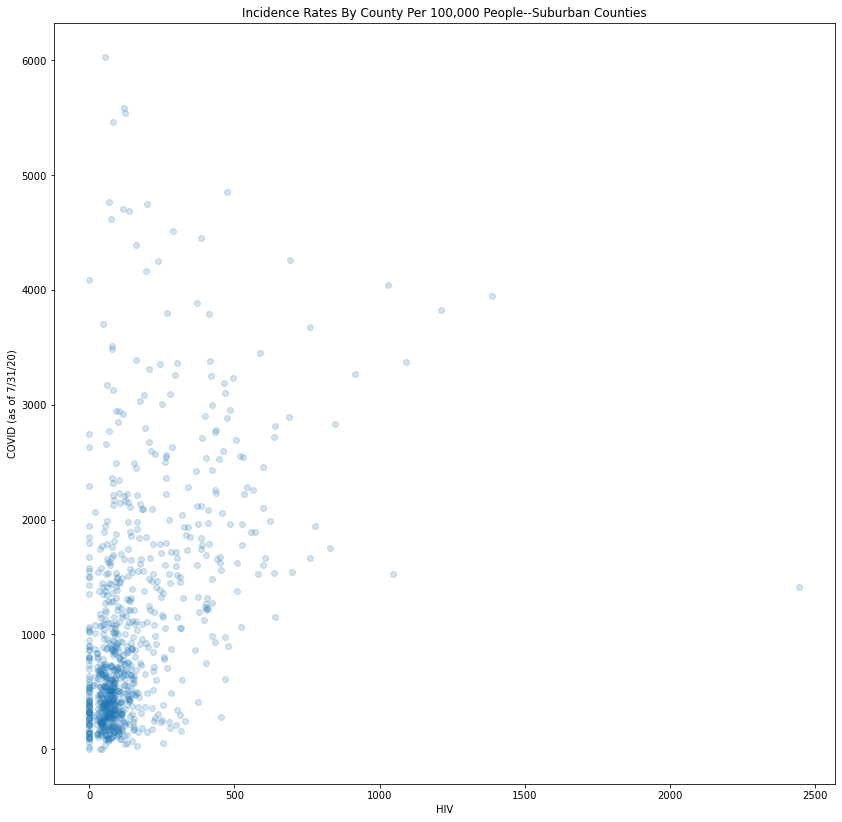

In [214]:
fig, ax = plt.subplots(figsize = (14,14))

ax.scatter(suburban['HIVprevalence'], suburban['COVID_Incidence'], alpha = 0.2)
ax.set_xlabel('HIV')
ax.set_ylabel('COVID (as of 7/31/20)')
ax.set_title('Incidence Rates By County Per 100,000 People--Suburban Counties')

## Single parameter linear regression

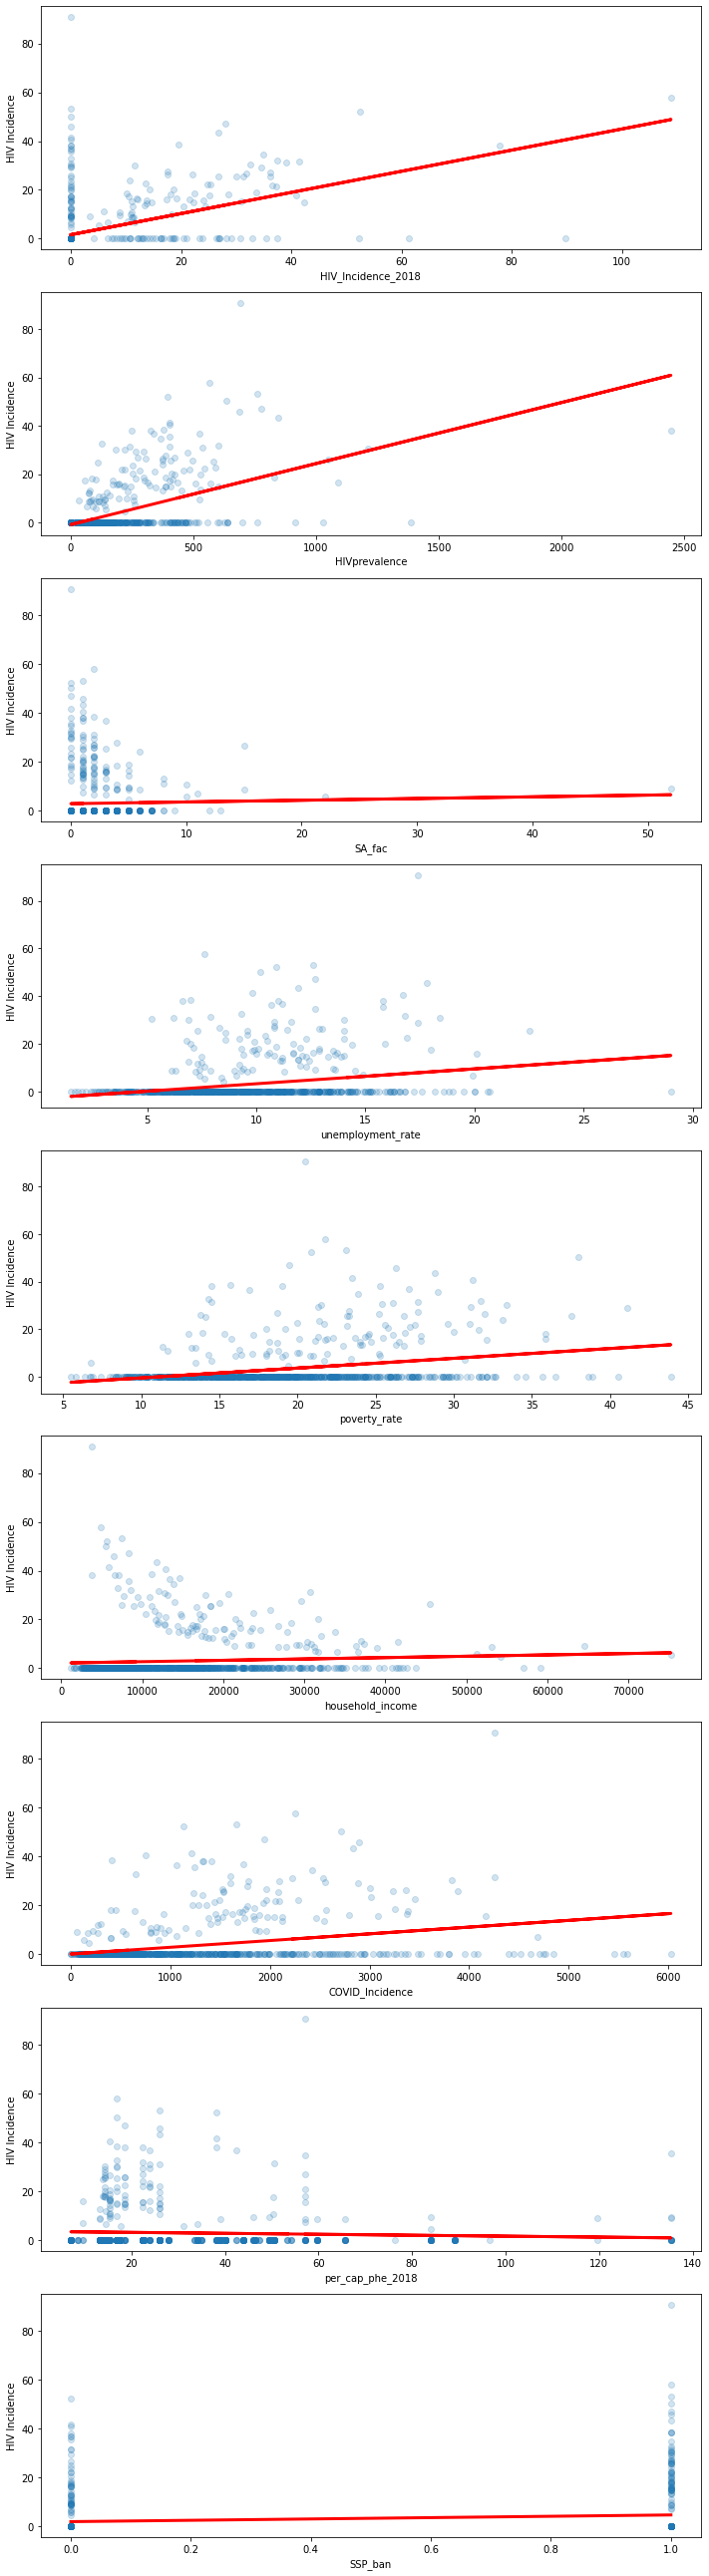

In [215]:
y = correlations['HIVincidence']
correlations = correlations.drop('HIVincidence', axis=1)
columns = correlations.columns
model = LinearRegression()

fig, axs = plt.subplots(len(columns),1, figsize = (10,len(columns)*4))
for i, ax in enumerate(axs.flatten()):
    X = correlations[columns[i]].values.reshape(-1,1)
    model.fit(X, y)
    yhat = model.predict(X)
    ax.plot(correlations[columns[i]], yhat, linewidth = 3, color = 'r')
    ax.scatter(correlations[columns[i]], y, alpha=0.2)
    ax.set_xlabel(columns[i])
    ax.set_ylabel('HIV Incidence')
fig.tight_layout()

## HIV and COVID comparisons only

In [234]:
X = df[['HIVprevalence', 'unemployment_rate', 'poverty_rate', 'household_income',
       'COVID_Incidence','per_cap_phe_2018']]
y = X['COVID_Incidence']
X['yint'] = 1
X.drop('COVID_Incidence', inplace=True, axis=1)

/home/salvir1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/salvir1/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [235]:
covid_model = LinearRegression()
covid_model.fit(X, y)
yhat = covid_model.predict(X)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Ryan's original model

In [144]:
money_df = df[['HIVincidence','HIVdiagnoses', 'HIVprevalence', 'unemployment_rate', 'poverty_rate', 'household_income']]

In [145]:
money_df.corr()

,HIVincidence,HIVdiagnoses,HIVprevalence,unemployment_rate,poverty_rate,household_income
HIVincidence,1.000000,0.267121,0.421939,0.132974,0.091102,0.192512
HIVdiagnoses,0.267121,1.000000,0.427513,0.068800,0.014922,0.888145
HIVprevalence,0.421939,0.427513,1.000000,0.326536,0.276576,0.330398
unemployment_rate,0.132974,0.068800,0.326536,1.000000,0.625880,0.061042
poverty_rate,0.091102,0.014922,0.276576,0.625880,1.000000,-0.062332
household_income,0.192512,0.888145,0.330398,0.061042,-0.062332,1.000000


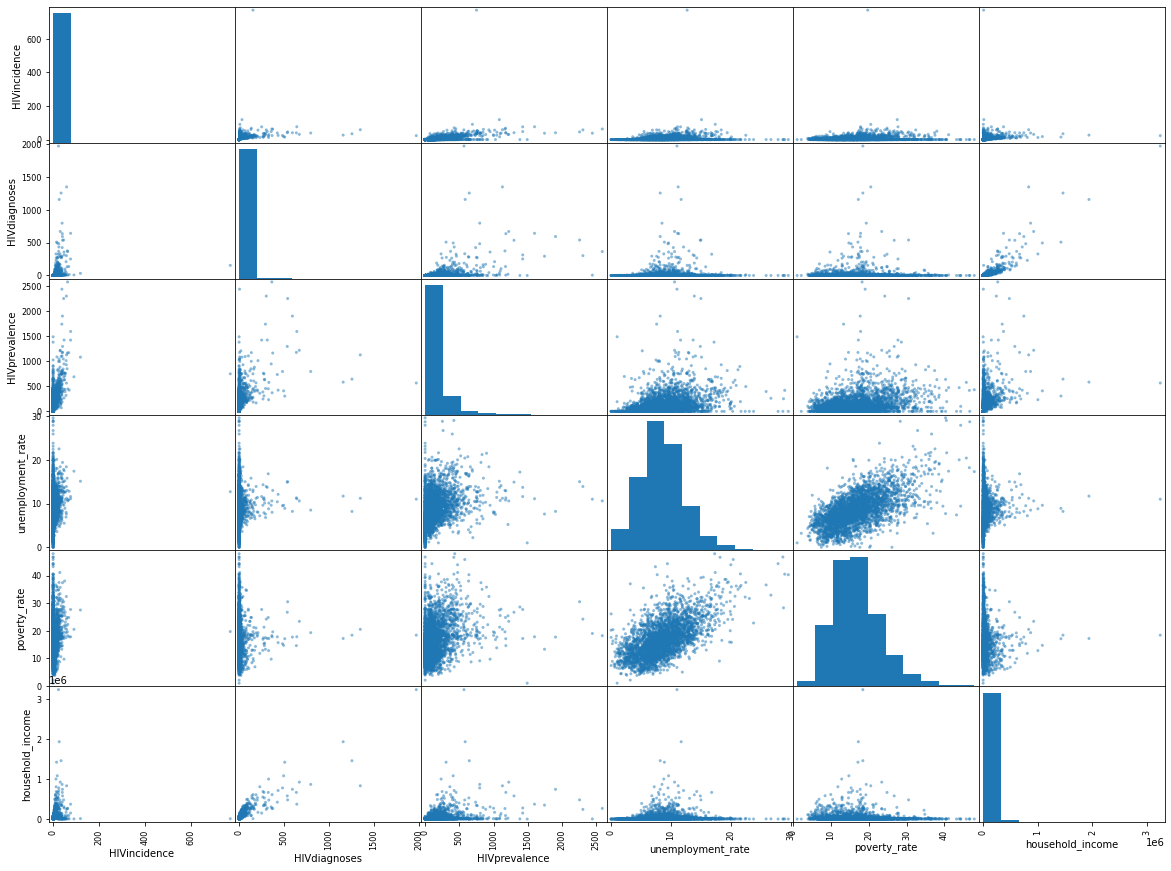

In [153]:
scatter_matrix(money_df, figsize=(20,15));

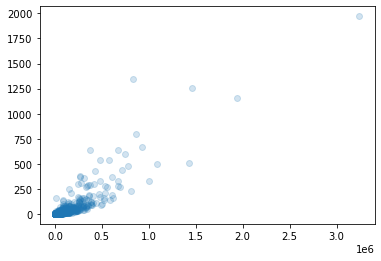

In [154]:
plt.scatter(y=money_df['HIVdiagnoses'], x=money_df['household_income'], alpha=0.2)

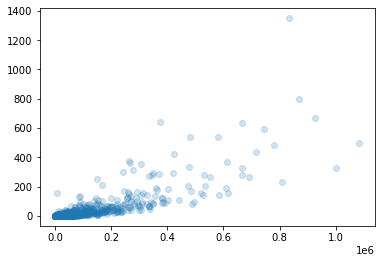

In [155]:
household_income = money_df[money_df['household_income'] < 1250000]
plt.scatter(y=household_income['HIVdiagnoses'], x=household_income['household_income'], alpha=0.2)

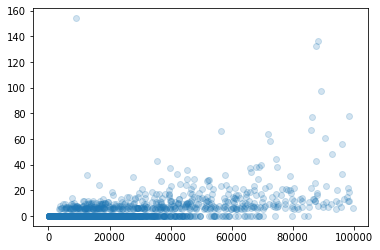

In [156]:
HI_less500 = household_income[household_income['household_income'] < 100000]
plt.scatter(y=HI_less500['HIVdiagnoses'], x=HI_less500['household_income'], alpha=0.2)

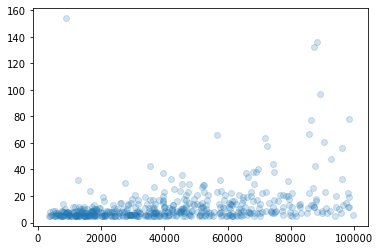

In [157]:
diagnosis_gt_zero = HI_less500[HI_less500['HIVdiagnoses'] != 0]
plt.scatter(y=diagnosis_gt_zero['HIVdiagnoses'], x=diagnosis_gt_zero['household_income'], alpha=0.2)

In [158]:
diagnosis_gt_zero.corr()

,HIVincidence,HIVdiagnoses,HIVprevalence,unemployment_rate,poverty_rate,household_income
HIVincidence,1.000000,0.533503,0.330662,0.164913,0.177875,-0.218606
HIVdiagnoses,0.533503,1.000000,0.388903,0.055988,0.118190,0.333957
HIVprevalence,0.330662,0.388903,1.000000,0.335875,0.391868,-0.263032
unemployment_rate,0.164913,0.055988,0.335875,1.000000,0.612098,-0.319283
poverty_rate,0.177875,0.118190,0.391868,0.612098,1.000000,-0.410595
household_income,-0.218606,0.333957,-0.263032,-0.319283,-0.410595,1.000000


In [159]:
un_outlier_rm = un_outlier_rm[un_outlier_rm['HIVincidence'] < 750]

NameError: name 'un_outlier_rm' is not defined

In [ ]:
un_outlier_rm = money_df

un_outlier_rm.sort_values('HIVincidence', ascending=False).head()

plt.scatter(y=un_outlier_rm['HIVincidence'], x=un_outlier_rm['unemployment_rate'], alpha=0.2)

In [172]:
df.head()

,county_code,COUNTY,ST,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,...,HIV_Incidence_2017,FIPS_x,Urbanization Level,FIPS_y,COUNTY_COV,ST_COV,COVID_Incidence,Location,per_cap_phe_2018,SSP_ban
0,1001.0,Autauga County,AL,2015.0,0.0,5.0,10.9,225.5,1.0,0.0,...,21.6,1001.0,Urban,1001.0,Autauga,Alabama,1739.784138,AL,57.23,1.0
1,1003.0,Baldwin County,AL,2015.0,0.0,15.0,8.7,163.9,4.0,0.0,...,6.1,1003.0,Urban,1003.0,Baldwin,Alabama,1368.967093,AL,57.23,1.0
2,1005.0,Barbour County,AL,2015.0,0.0,0.0,0.0,436.0,1.0,0.0,...,0.0,1005.0,Suburban,1005.0,Barbour,Alabama,2227.983472,AL,57.23,1.0
3,1007.0,Bibb County,AL,2015.0,0.0,0.0,0.0,191.9,0.0,0.0,...,25.9,1007.0,Urban,1007.0,Bibb,Alabama,1585.246048,AL,57.23,1.0
4,1009.0,Blount County,AL,2015.0,0.0,5.0,10.4,95.4,1.0,0.0,...,0.0,1009.0,Urban,1009.0,Blount,Alabama,1184.588248,AL,57.23,1.0


In [175]:
first_test = df.drop(['COUNTY', 'county_code', 'ST', 'YEAR', 'Location'], axis=1)

In [177]:
first_test.isnull().any()
first_test['HIV_Incidence_2018'].sort_values(ascending=False)

513     124.0
2602    108.9
409      89.7
381      77.8
445      68.3
        ...  
3290      NaN
3291      NaN
3292      NaN
3293      NaN
3294      NaN
Name: HIV_Incidence_2018, Length: 3295, dtype: float64

In [178]:
first_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 3294
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AMAT_fac            3140 non-null   float64
 1   HIVdiagnoses        3140 non-null   float64
 2   HIVincidence        3140 non-null   float64
 3   HIVprevalence       3140 non-null   float64
 4   MH_fac              3140 non-null   float64
 5   Med_AMAT_fac        3140 non-null   float64
 6   Med_MH_fac          3140 non-null   float64
 7   Med_SA_fac          3140 non-null   float64
 8   Med_SMAT_fac        3140 non-null   float64
 9   Med_TMAT_fac        3140 non-null   float64
 10  PLHIV               3140 non-null   float64
 11  Population          3140 non-null   float64
 12  SA_fac              3140 non-null   float64
 13  SMAT_fac            3140 non-null   float64
 14  TMAT_fac            3140 non-null   float64
 15  drugdeathrate       3140 non-null   float64
 16  drugde

In [181]:
first_test['mme_percap'] = first_test['mme_percap'].fillna(np.mean(first_test['mme_percap']))
first_test['partD30dayrxrate'] = first_test['partD30dayrxrate'].fillna(np.mean(first_test['partD30dayrxrate']))
first_test['drugdep'] = first_test['drugdep'].fillna(np.mean(first_test['drugdep']))
first_test['pctunmetneed'] = first_test['pctunmetneed'].fillna(np.mean(first_test['pctunmetneed']))
first_test['nonmedpain'] = first_test['nonmedpain'].fillna(np.mean(first_test['nonmedpain']))
first_test['per_cap_phe_2018'] = first_test['per_cap_phe_2018'].fillna(np.mean(first_test['per_cap_phe_2018']))

In [182]:
first_test.isnull().any()

AMAT_fac               True
HIVdiagnoses           True
HIVincidence           True
HIVprevalence          True
MH_fac                 True
Med_AMAT_fac           True
Med_MH_fac             True
Med_SA_fac             True
Med_SMAT_fac           True
Med_TMAT_fac           True
PLHIV                  True
Population             True
SA_fac                 True
SMAT_fac               True
TMAT_fac               True
drugdeathrate          True
drugdeathrate_est      True
drugdeaths             True
mme_percap            False
partD30dayrxrate      False
pctunins               True
num_SSPs               True
bup_phys               True
drugdep               False
pctunmetneed          False
nonmedpain            False
ADULTMEN               True
MSM12MTH               True
MSM5YEAR               True
%msm12month            True
%msm5yr                True
unemployment_rate      True
poverty_rate           True
household_income       True
HIV_Incidence_2018     True
HIV_Incidence_2017  

In [183]:
X = first_test[['HIVprevalence', 'Med_SMAT_fac', 'SA_fac', 'partD30dayrxrate', 'ADULTMEN', '%msm12month', '%msm5yr', 'household_income']].values
y = first_test['HIVincidence'].values

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.api as sms

In [185]:
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=30)

def k_fold_trials(n_trials):
    
    results = []
    
    for _ in range(n_trials):
    
        kf = KFold(n_splits=10, shuffle=True)

        yhats = []
        rmses = []

        for train_idx, test_idx in kf.split(X):
            train_X, train_y = X[train_idx], y[train_idx]
            test_X, test_y = X[test_idx], y[test_idx]
            model.fit(train_X, train_y)
            yhat = model.predict(test_X)
            yhats.append(yhat)
            rmses.append(np.sqrt(mean_squared_error(test_y, yhat)))
        
        results.append(np.mean(rmses))
    
    return results

In [186]:
np.mean(k_fold_trials(20))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [187]:
model = LinearRegression()
scaler = StandardScaler()
scaler.fit_transform(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

In [188]:
model.fit(X_train, y_train)
yhat = model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
mse = mean_squared_error(y_test, yhat)

print(y_test.sort_values(ascending=False))

In [ ]:
print(f"MSE: {mse}, RMSE: {np.sqrt(mse)}")

In [ ]:
first_test.corr()